In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

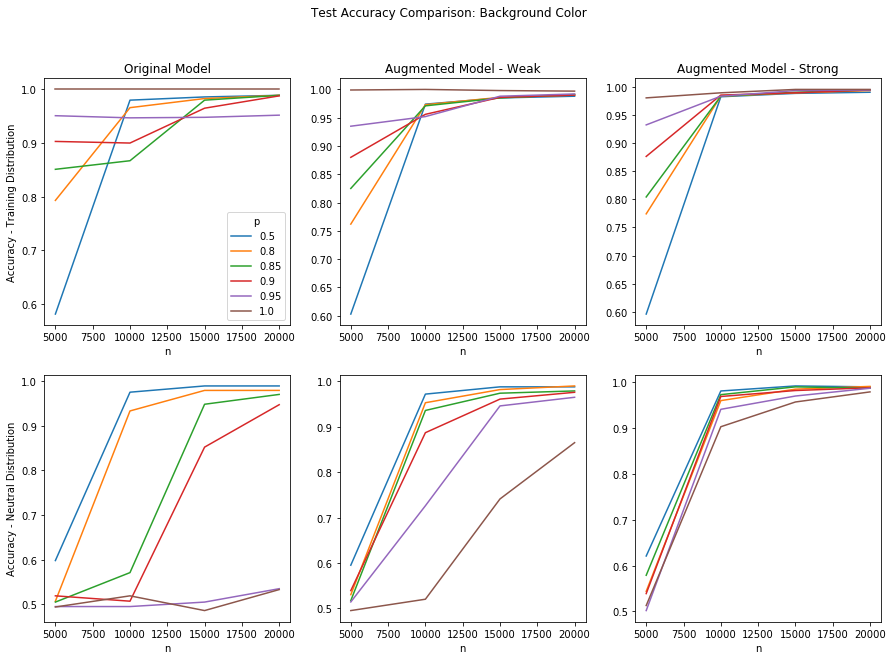

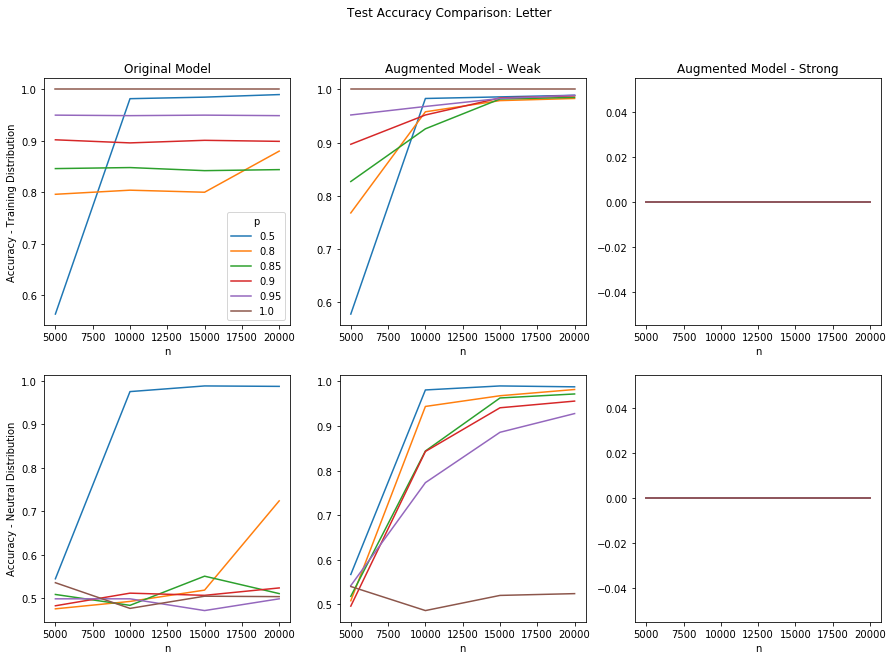

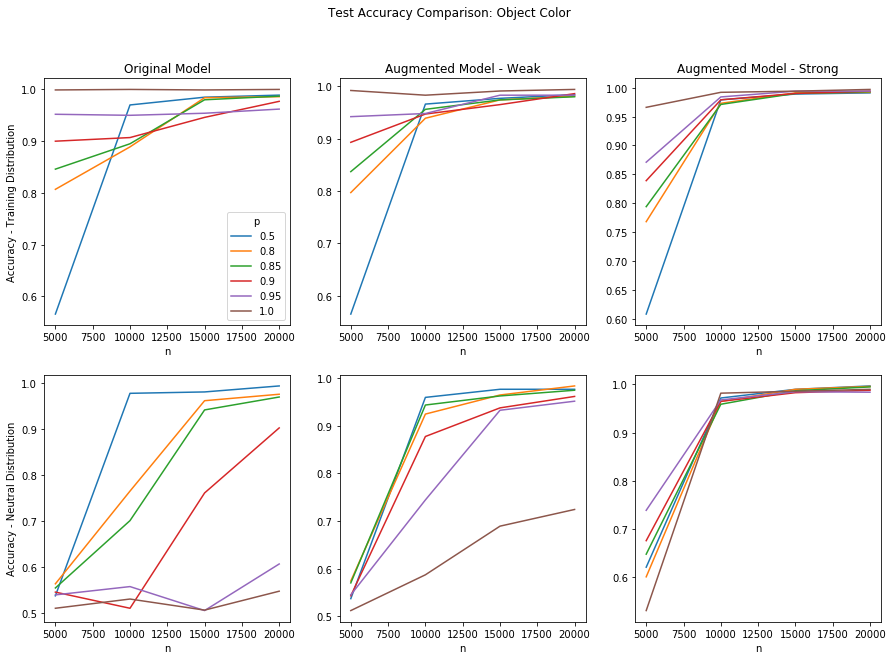

In [2]:
df_all = pd.read_csv("Run.csv")
df_all.columns = ["mode", "n", "p", "OT", "ON", "WT", "WN", "ST", "SN"]

def mode2name(mode):
    if mode == 1:
        return "Background Color"
    elif mode == 2:
        return "Letter"
    elif mode == 3:
        return "Object Color"

def var2title(var):
    v = var[0]
    if v == "O":
        return "Original Model"
    elif v == "W":
        return "Augmented Model - Weak"
    elif v == "S":
        return "Augmented Model - Strong"

for label_outer, df_outer in df_all.groupby("mode"):
  
    fig = plt.figure(figsize=(15, 10))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    
    fig.suptitle("Test Accuracy Comparison: {}".format(mode2name(label_outer)))
    c = 1
    for var in ["OT", "WT", "ST"]:
        plt.subplot(2, 3, c)
        for label, df in df_outer.groupby("p"):
            plt.plot(df["n"], df[var], label = label)
        plt.title(var2title(var))
        plt.xlabel("n")
        if c == 1:
            plt.ylabel("Accuracy - Training Distribution")
            plt.legend(title = "p")
        c  += 1

    
    
    for var in ["ON", "WN", "SN"]:
        plt.subplot(2, 3, c)
        for label, df in df_outer.groupby("p"):
            plt.plot(df["n"], df[var], label = label)
        plt.xlabel("n")
        if c == 4:
            plt.ylabel("Accuracy - Neutral Distribution")
        c += 1

    plt.show()
    plt.close()
    
    